Understand how to handle Date-Time data in Pandas and build a Naive Baseline Model (The "Tomorrow will be the same as Today" guess). Key Skill: Indexing by Date & Shifting Data.

# The Concept: The "Weather" Rule 
***`If I ask you: "What will the temperature be tomorrow?" And you have zero tools, no radar, no satellite... what is your best guess?`***

## "It will probably be the same as today."

This is called the Naive Forecast (or Persistence Model). It sounds stupid, but in Time Series, it is surprisingly hard to beat.

If today is 75°F, guessing 75°F for tomorrow is usually a decent bet.

If Apple Stock is $ 150  today, 

guessing $150 for tomorrow 

is safer than guessing $200.

We use this as our Baseline. If your fancy AI model can't beat this simple guess, your AI is worthless.

# 1: Setup & Make Fake Stock Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#create a 1 year date range

dates = pd.date_range(start='2024-01-01', end = '2024-12-31' , freq="D")

#create fake price data (random walk)
# we start at $100 and add a random mount (-2 or +2)every day


np.random.seed(42)
price_changes = np.random.uniform(-2,2,size=len(dates))
prices = 100 + np.cumsum(price_changes)

In [6]:
#create dataframe

df = pd.DataFrame({'Date':dates , 'Price':prices})

#important: set date as the index
df.set_index('Date', inplace = True )

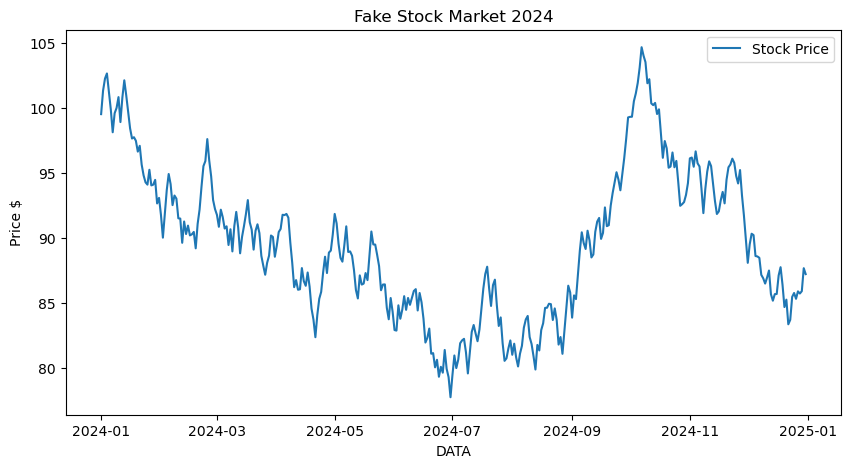

In [7]:
#visualise

plt.figure(figsize=(10,5))
plt.plot(df.index,df['Price'], label ='Stock Price')
plt.title("Fake Stock Market 2024")
plt.xlabel('DATA')
plt.ylabel('Price $')
plt.legend()
plt.show()

# 2: The "Shift" (Creating the Prediction)

In [8]:
df['Naive_Prediction'] = df['Price'].shift(1)

print(df.head())

                 Price  Naive_Prediction
Date                                    
2024-01-01   99.498160               NaN
2024-01-02  101.301018         99.498160
2024-01-03  102.228993        101.301018
2024-01-04  102.623627        102.228993
2024-01-05  101.247702        102.623627


In [10]:
#Drop NaN
df.dropna(inplace=True)
print(df)

                 Price  Naive_Prediction
Date                                    
2024-01-02  101.301018         99.498160
2024-01-03  102.228993        101.301018
2024-01-04  102.623627        102.228993
2024-01-05  101.247702        102.623627
2024-01-06   99.871680        101.247702
...                ...               ...
2024-12-27   85.877323         85.304170
2024-12-28   85.710335         85.877323
2024-12-29   85.892802         85.710335
2024-12-30   87.658661         85.892802
2024-12-31   87.203072         87.658661

[365 rows x 2 columns]


# 3: Plotting the Truth vs. The Guess

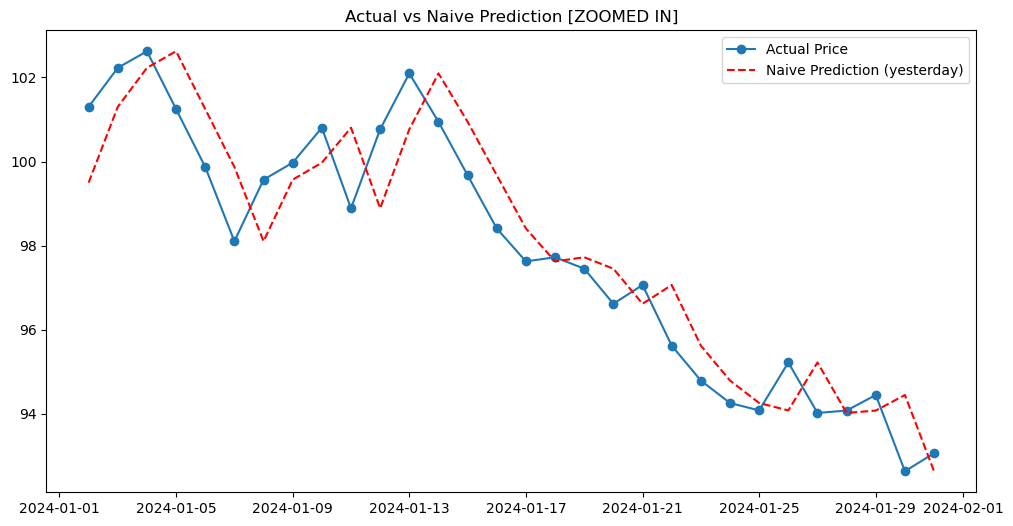

In [11]:
subset = df['2024-01-01': '2024-01-31']

plt.figure(figsize=(12,6))
plt.plot(subset.index, subset['Price'], label ='Actual Price', marker = 'o')
plt.plot(subset.index, subset['Naive_Prediction'], label = 'Naive Prediction (yesterday)' , linestyle = '--' , color = 'red')

plt.title('Actual vs Naive Prediction [ZOOMED IN]')
plt.legend()
plt.show()

# 4: Evaluate the Error

How wrong were we on average?

We use MAE (Mean Absolute Error).

In [14]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df['Price'], df['Naive_Prediction'])
print(f'On avg , our naive guess was off by : ${mae:.2f}')

On avg , our naive guess was off by : $1.01
